<a href="https://colab.research.google.com/github/chetansy/Classification-Using-ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## spliting dependent and independnt features

x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
## feature engineering

geography = pd.get_dummies(x['Geography'],drop_first = True)
gender = pd.get_dummies(x['Gender'],drop_first = True)

In [9]:
## Dropping two columns
x = x.drop(['Gender','Geography'],axis = 1)

In [10]:
## concate two columns dat v hav created
x = pd.concat([x, geography,gender],axis = 1)

In [11]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
## splitting te dataset into train & test 
# !pip install sklearn
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train,y_test = train_test_split(x, y , test_size = 0.2,random_state=0)

In [14]:
## Scaling feature

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [15]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
x_train.shape

(8000, 11)

In [17]:
## Lets create Part 2 for ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, PReLU, LeakyReLU,ELU
from tensorflow.keras.layers import Dropout

In [18]:
## lets intialize ANN
classifier = Sequential()

In [19]:
## Adding Input layers
classifier.add(Dense(units = 11 , activation = 'relu'))
# classifier.add(Dropout(0.3))

## Adding Hidden layers
classifier.add(Dense(units = 7, activation = 'relu'))
# classifier.add(Dropout(0.3))

In [20]:
## Adding second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))
# classifier.add(Dropout(0.3))

In [21]:
## adding output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# classifier.add(Dropout(0.3))

In [22]:
## lets train our NN model
#classifier.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ['accuracy']) ## 'adam' takes learning rate bydefault as 0.1
                                                                                           ## So no need to mention learning rate

In [23]:
## if u want to customize learning rate in Adam 

import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)
classifier.compile(optimizer=opt, loss = "binary_crossentropy", metrics = ['accuracy']) ## 'adam' takes learning rate bydefault as 0.1


In [24]:
## Early Stopping

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", min_delta = 0.0001, patience = 20, verbose = 1 , mode = "auto", baseline = None, restore_best_weights=False)

In [25]:

model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4123 - accuracy: 0.8235 - val_loss: 0.3835 - val_accuracy: 0.8368
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3584 - accuracy: 0.8492 - val_loss: 0.3734 - val_accuracy: 0.8432
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3502 - accuracy: 0.8559 - val_loss: 0.3675 - val_accuracy: 0.8466
Epoch 4/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3478 - accuracy: 0.8563 - val_loss: 0.3664 - val_accuracy: 0.8410
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3411 - accuracy: 0.8559 - val_loss: 0.3652 - val_accuracy: 0.8459
Epoch 6/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3402 - accuracy: 0.8565 - val_loss: 0.3661 - val_accuracy: 0.8466
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3401 - accuracy: 0.8587 - val_loss: 0.3596 - val_accuracy:

In [26]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

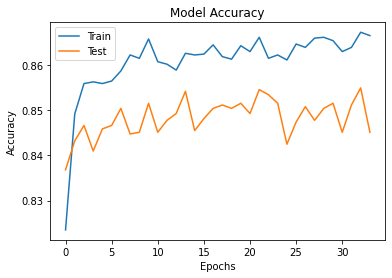

In [27]:
## SUmmerize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'],loc = 'upper left')
plt.show()

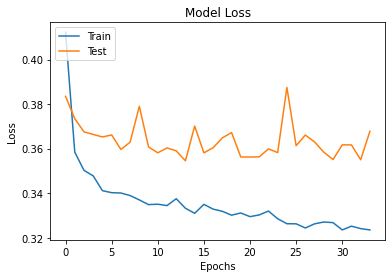

In [28]:
## Summerize history for Loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc= 'upper left')
plt.show()

In [29]:
## Making predictions & evaluating Models
## Predicting test result

y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1534,   61],
       [ 218,  187]])

In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8605

In [32]:
classifier.get_weights()

[array([[ 0.0142875 ,  0.48503014, -0.60300547, -0.05460153, -0.4694829 ,
         -0.5782    , -0.3799403 ,  0.7069488 ,  0.70334756,  0.01351585,
          0.21567586],
        [ 0.23266253, -0.6562728 ,  1.3366902 ,  0.6711821 , -1.7566899 ,
          2.5075486 ,  3.2949522 , -0.6926109 ,  1.9518385 , -1.7634311 ,
         -1.8010267 ],
        [ 0.01579083,  0.3518399 , -0.13314418, -0.10048882, -0.01577511,
          0.57228047, -0.2625976 ,  0.34404206,  0.0837099 ,  0.8182205 ,
         -0.9805079 ],
        [-3.20301   , -0.74832344,  0.04222915,  0.74333143, -1.1719104 ,
         -1.4902127 ,  0.7846354 , -1.7711266 , -0.37350157, -0.2113091 ,
          1.3192424 ],
        [-3.5477655 ,  1.6821208 , -0.13454705,  2.9809752 , -0.35787773,
          0.09571849, -1.8147057 , -0.1321157 , -0.7449557 ,  0.08377431,
          0.17415917],
        [-0.0966548 ,  1.3885338 , -0.4660082 , -0.03079916, -0.6367505 ,
         -0.3804753 , -0.4663158 , -0.00890717,  1.2272693 ,  0.0766900

In [33]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64